In [15]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

 Activating environment at `~/Documents/kubo_analysis_julia/notebook/Project.toml`


# 2 確率分布と統計モデルの最尤推定

In [16]:
using DataStructures
using Distributions
using Plots
using StatsBase
using Statistics

## 2.1 例題 : 種子数の統計モデリング
### 種子数データ

In [17]:
data = [2, 2, 4, 6, 4, 5, 2, 3, 1, 2, 0, 4, 3, 3, 3, 3,4, 2, 7, 2, 4, 3, 3, 3, 4,
3, 7, 5, 3, 1, 7, 6, 4, 6, 5, 2, 4, 7, 2, 2, 6, 2, 4, 5, 4, 5, 1, 3, 2, 3]

50-element Array{Int64,1}:
 2
 2
 4
 6
 4
 5
 2
 3
 1
 2
 0
 4
 3
 ⋮
 2
 2
 6
 2
 4
 5
 4
 5
 1
 3
 2
 3

### データ数

In [18]:
length(data)

50

### データの要約

In [19]:
describe(data)

Summary Stats:
Length:         50
Missing Count:  0
Mean:           3.560000
Minimum:        0.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   4.750000
Maximum:        7.000000
Type:           Int64


### 度数分布

In [20]:
SortedDict(countmap(data))

SortedDict{Int64,Int64,Base.Order.ForwardOrdering} with 8 entries:
  0 => 1
  1 => 3
  2 => 11
  3 => 12
  4 => 10
  5 => 5
  6 => 4
  7 => 4

### ヒストグラム

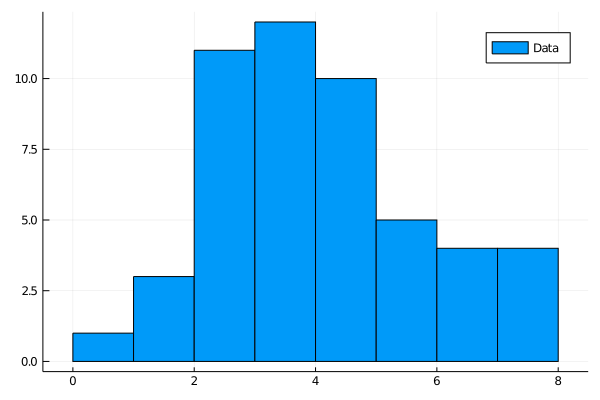

In [21]:
histogram(data, bins=10, label="Data")

### 標本分散

In [22]:
var(data)

2.9861224489795917

### 標本標準偏差

In [23]:
std(data)

1.728040060004279

## 2.2 データと確率分布の対応関係をながめる
### ポアソン分布
https://juliastats.github.io/Distributions.jl/latest/univariate.html#Distributions.Poisson

In [24]:
y = 0:9
prob = pdf.(Poisson(3.56), y)

10-element Array{Float64,1}:
 0.028438824714184505
 0.10124221598249684
 0.18021114444884437
 0.21385055807929534
 0.19032699669057287
 0.1355128216436879
 0.08040427417525477
 0.04089131658055819
 0.018196635878348365
 0.0071977804141022395

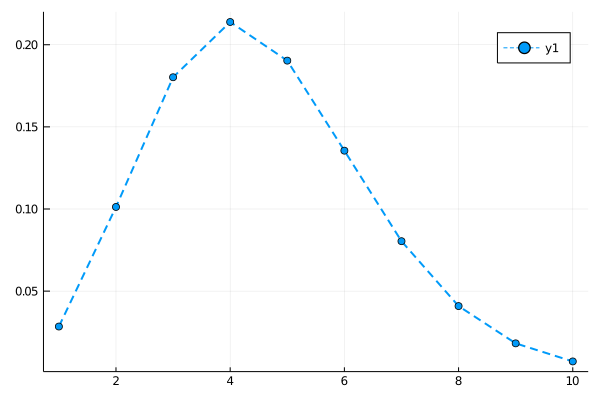

In [25]:
plot(prob, linewidth=2, linestyle=:dash, marker=4)

### 観測データと確率分布の対応

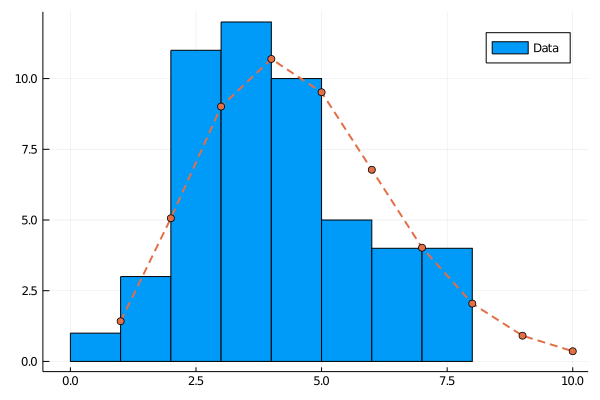

In [26]:
histogram(data, bins=10, label="Data")
plot!(prob * 50, linewidth=2, linestyle=:dash, marker=4, label="")

## 2.4 ポアソン分布のパラメーターの最尤推定
### 対数尤度 $\log L(\lambda)$と$\lambda$の関係

In [27]:
logL(m) = sum(log.(pdf.(Poisson(m), data)))

logL (generic function with 1 method)

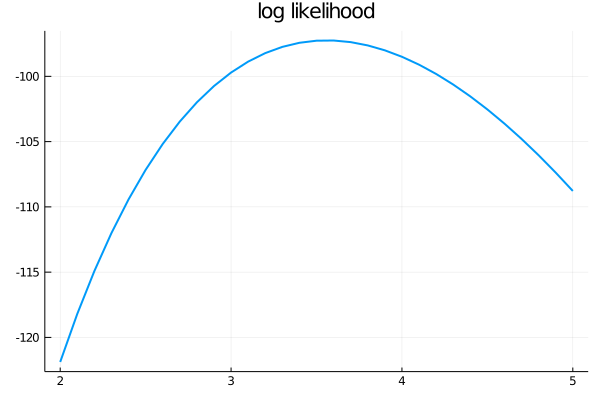

In [28]:
lambda = 2:0.1:5
plot(lambda, logL.(lambda), linewidth=2, title="log likelihood", label="")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*